In [1]:
#File name: linear_curvefit.ipynb
#Least Squares Fitting a line to data with errors
#Based on:
#https://github.com/anazalea/phys2300stuff/tree/master/climateData
#https://github.com/anazalea/phys2300stuff/blob/master/climateData/climateChange.ipynb

In [2]:
# Input data name, axes limits, plot title, and output file names
# Change all these for your data set
datafile='tempdata.csv'
xlabel='Year'
ylabel='Average Global Surface Temperature in January [$^\circ$C]'
title='Average Global Surface Temperature in January'
xmin=1750
xmax=2015
ymin=-5
ymax=10
ymin_residuals=-10
ymax_residuals=10
plot1='climatePlot1b.png'
plot2='climatePlot2b.png'
plot3='climatePlot3b.png'
step=0.05#Step size for plotting fit line

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
#import uncertainties.unumpy as unumpy
#from uncertainties import ufloat as uf

In [4]:
#Data from .../climateData website copied to tempdata.csv in my Syxygy terminal
#Data in same folder as notebook
#Data format: Year, Temperature (T), error on T
data = np.genfromtxt(datafile,delimiter=',',dtype=float)

In [5]:
#Get vectors from the data
xvar = data[:,0]# Make a vector of all elements (:) in the first column (0) 
yvar = data[:,1]   # Make a vector of all elements in the second column 
dyvar = data[:,2]  # Make a vector of all elements in the third column 
# Get the length of xvar vector (number of entries)
print("Length of the 1st vector:",len(xvar))

Length of the 1st vector: 266


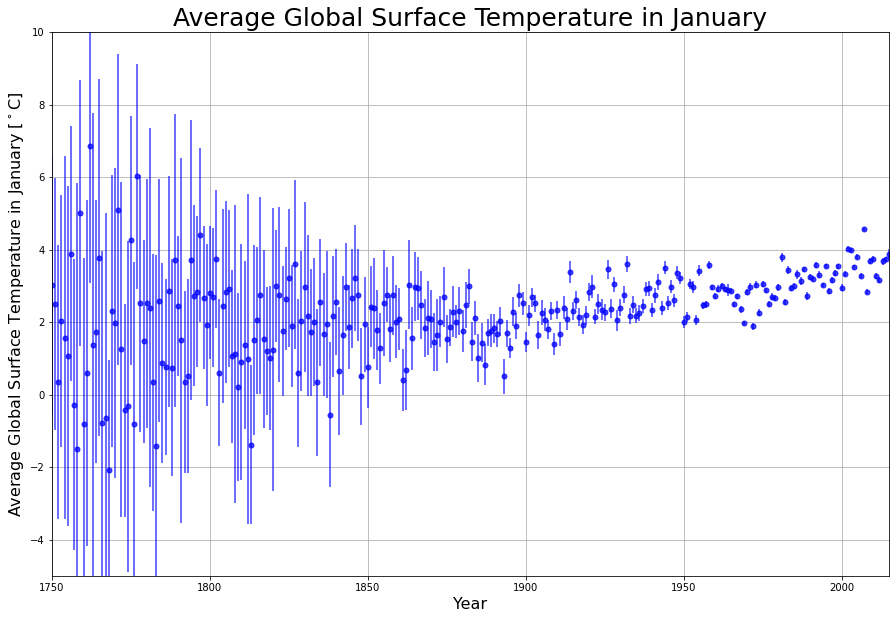

In [6]:
# Plot the Data y vs. x,  including errors on y
plt.errorbar(xvar,yvar,yerr=dyvar,fmt='o',ms=5,color='blue',alpha=0.75)
plt.gcf().set_size_inches(15,10) # This sets the size of the plot
#The next two lines set the ranges for plotting the x and y variables
plt.ylim(ymin,ymax) # This sets the range of the y-axes
plt.xlim(xmin,xmax) # This sets the range of the x-axes
#
plt.grid(True) # This toggles whether gridlines are displayed
#The next four lines set the axis labels, plot title, and output file name; edit to describe your data
plt.xlabel(xlabel,fontsize=16) #x-axis label
plt.ylabel(ylabel,fontsize=16) #y-axis label
plt.title(title,fontsize=25) #Plot title
plt.savefig(plot1,bbox_inches='tight',dpi=300) #Saves the figure 

In [7]:
def func(x, m,b):# Defines the variable(x) and the parameters (m, b)

    return m*x+b # Defines the model function

In [8]:
popt, pcov = curve_fit(func, xvar,yvar,sigma=dyvar,absolute_sigma=True)# Fits the data to the curve function "func"
slope=popt[0] # fitted value of the first parameter: m
intercept=popt[1]#fitted value of the 2nd parameter:b


In [9]:
# Create an array of values starting at xmin, going up to xmax, with steps on 10
# This will be used to plot the line of the best fit values
xForLine = np.arange(xmin,xmax,step) 
# Calculate the value of y= slope * x + intercept at each x
yForLine = slope*xForLine + intercept

In [10]:
#Calculate the residuals and Chi-sq
# Residuals
residual=yvar-(slope*xvar+intercept)
# Chi-sq; ndof=no. entries - no. parameters -1
ndof=len(xvar)-2-1
ru=residual/dyvar
chsq=np.sum(np.power(ru,2))/ndof
print("chisq",str.format('{0:.6f}',chsq))#Print 6 significant figures
#


chisq 8.252013


In [11]:
#Diagonal of Covariance matrix gives the variance of parameters (sigma**2)
perr = np.sqrt(np.diag(pcov)) # Square root of diagonal elements (sigma)
#perr[0],perr[1]
print("slope",slope)
print("slope error",perr[0])
print("intercept",intercept)
print("intercept error",perr[1])
print(pcov)

slope 0.014592998979356004
slope error 0.00035143272298292867
intercept -25.835435759295528
intercept error 0.6957751609633558
[[ 1.23504959e-07 -2.44495149e-04]
 [-2.44495149e-04  4.84103075e-01]]


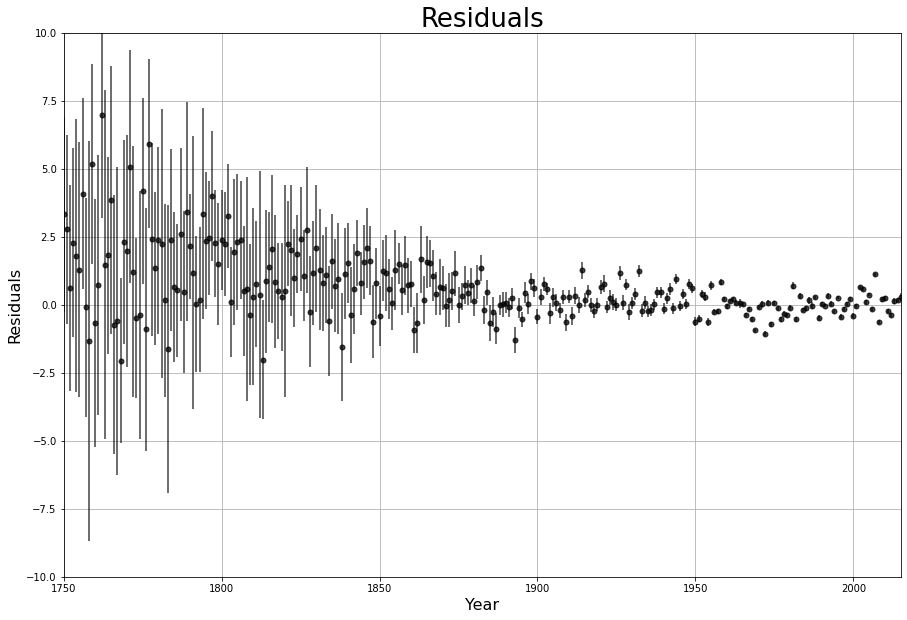

In [12]:
#Plot the residuals 
plt.errorbar(xvar,residual,yerr=dyvar,fmt='o',ms=5,color='black',alpha=0.75)
plt.gcf().set_size_inches(15,10) # This sets the size of the plot
plt.ylim(ymin_residuals,ymax_residuals) # This sets the range of the y-axes
plt.xlim(xmin,xmax) # This sets the range of the x-axis
plt.grid(True) # This toggles whether gridlines are displayed
plt.xlabel(xlabel,fontsize=16)
plt.ylabel('Residuals',fontsize=16)
plt.title('Residuals',fontsize=26)
#f in front of the string'....' allows the variable in {chsq} to be printed
# This allows selecting the no. sig. digits and rounding to be printed on plot
#chi = "Chi-sq ={:.3f}".format(round(chsq, 3))
#chi = "Chi-sq ={:.1f}".format(chsq)#rounds to 1 sig. digit
#plt.annotate(chi ,xy=(1900,8),  xytext=(1900,8),color="blue",fontsize=24)
# Add the line
#plt.plot(xForLine,yForLine,lw=3,color='red',alpha=0.5,label='Line of Best Fit')
# Add a legend
# plt.legend()
plt.savefig(plot2,bbox_inches='tight',dpi=300) #Saves the figure 


Least Squares Fit:
     slope            m= 0.014593
     slope error     dm= 0.000351
     intercept        b= -25.835436
     intercept error db= 0.695775
Chisq 8.2520


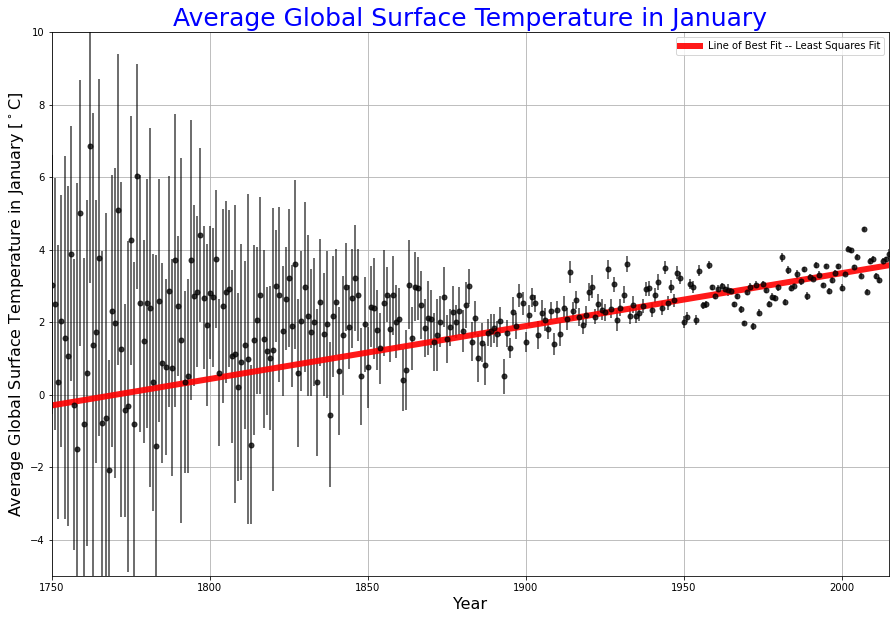

In [13]:
#Plot the best fit line with the data
plt.errorbar(xvar,yvar,yerr=dyvar,fmt='o',ms=5,color='black',alpha=0.75)
plt.gcf().set_size_inches(15,10) # This sets the size of the plot
plt.ylim(ymin,ymax) # This sets the range of the x-axis
plt.xlim(xmin,xmax) # This sets the range of the y-axis
plt.grid(True) # This toggles whether gridlines are displayed
plt.xlabel(xlabel,fontsize=16)
plt.ylabel(ylabel,fontsize=16)

# Add the line
plt.plot(xForLine,yForLine,lw=6,color='red',alpha=0.9,label='Line of Best Fit -- Least Squares Fit')

plt.title(title,fontsize=25,color='blue')

print("Least Squares Fit:")
print("     slope            m=",str.format('{0:.6f}',slope))
print("     slope error     dm=",str.format('{0:.6f}',perr[0]))
print("     intercept        b=",str.format('{0:.6f}',intercept))
print("     intercept error db=",str.format('{0:.6f}',perr[1]))
print("Chisq", str.format('{0:.4f}',chsq))#Print 4 significant figures
# Add a legend
plt.legend()
plt.savefig(plot3,bbox_inches='tight',dpi=300)
